In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


(288, 384)
float64


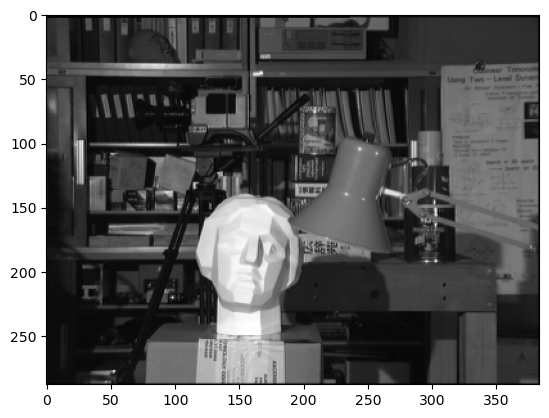

In [22]:
def read_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.astype('float64')
    return img

def plot_img(img, cmap="gray"):
    print(img.shape)
    print(img.dtype)
    plt.imshow(img.astype(int), cmap=cmap)

left = read_img("./data/left.png")
right = read_img("./data/right.png")
plot_img(left)

In [23]:
class StereoMatch():
    # when we take 1 object in fix 2 positions, the far, the fewer different between adjacent pixels
    # so if object near us, the disparity is high, vice versa
    # distance ~ 1/ disparity 
    def __init__(self, left, right, d=16):
        self.left = left
        self.right = right
        self.d = d
        self.disparity = np.zeros(self.left.shape)
        self.disparity_range = range(d)

    def matching(self, type = "pixel"):
        if type == "pixel":
            self.__pixelMatching()
        elif type =="window":
            self.__windowMatching()

    def __pixelMatching(self):
        h, w = self.left.shape
        right_d_matrix = []
        right_move_left_dpixel = self.right
        for d in self.disparity_range:
            if d !=0:
                # create matrix that move to the left of right image, padding -255 (because when take min of cost 2 images)
                right_move_left_dpixel = np.concatenate((np.ones((h,1))*(-255), right_move_left_dpixel[:,:-1 ]), axis = -1)
            right_d_matrix.append(right_move_left_dpixel)

        right_d_matrix = np.array(right_d_matrix)
        print(right_d_matrix.shape)
        cost = self.__cost(self.left, right_d_matrix)
        # for y in range(h):
        #     for x in range(w):
        #         d = np.argmin(cost[:, y, x])
        #         self.disparity[y,x] = d
        print(cost.shape)
        self.disparity = np.argmin(cost, axis = 0)
        print(self.disparity.shape)
        self.depth =  self.d * self.disparity

    def plotDepthImg(self, cmap = "bwr", scale = 1):
        self.depth *= scale
        plot_img(self.depth, cmap)
    def __windowMatching(self):
        pass

    def __cost(self,l, r):
        # can change cost function
        return (l-r)**2   

model = StereoMatch(left, right)
model.matching()

(16, 288, 384)
(16, 288, 384)
(288, 384)


(288, 384)
int64


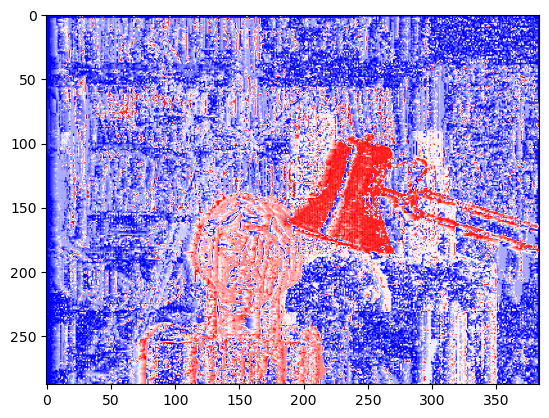

In [24]:
model.plotDepthImg()

In [8]:
a=  np.arange(20).reshape(4,5)
print(a)
c = np.ones((4,1))
print(c)
b = a
for i in range(5):
    b = np.concatenate((c, b[:, :-1]),axis=1)
    print(b)

print(np.argmin(b, axis=0))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[[1.]
 [1.]
 [1.]
 [1.]]
[[ 1.  1.  2.  3.  4.]
 [ 1.  6.  7.  8.  9.]
 [ 1. 11. 12. 13. 14.]
 [ 1. 16. 17. 18. 19.]]
[[ 1.  1.  2.  3.  4.]
 [ 1.  6.  7.  8.  9.]
 [ 1. 11. 12. 13. 14.]
 [ 1. 16. 17. 18. 19.]]
[[ 1.  1.  2.  3.  4.]
 [ 1.  6.  7.  8.  9.]
 [ 1. 11. 12. 13. 14.]
 [ 1. 16. 17. 18. 19.]]
[[ 1.  1.  2.  3.  4.]
 [ 1.  6.  7.  8.  9.]
 [ 1. 11. 12. 13. 14.]
 [ 1. 16. 17. 18. 19.]]
[[ 1.  1.  2.  3.  4.]
 [ 1.  6.  7.  8.  9.]
 [ 1. 11. 12. 13. 14.]
 [ 1. 16. 17. 18. 19.]]
[0 0 0 0 0]
